C:\Users\Danmc\AppData\Local\Temp\ipykernel_2976\648423125.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
c:\Users\Danmc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.ht

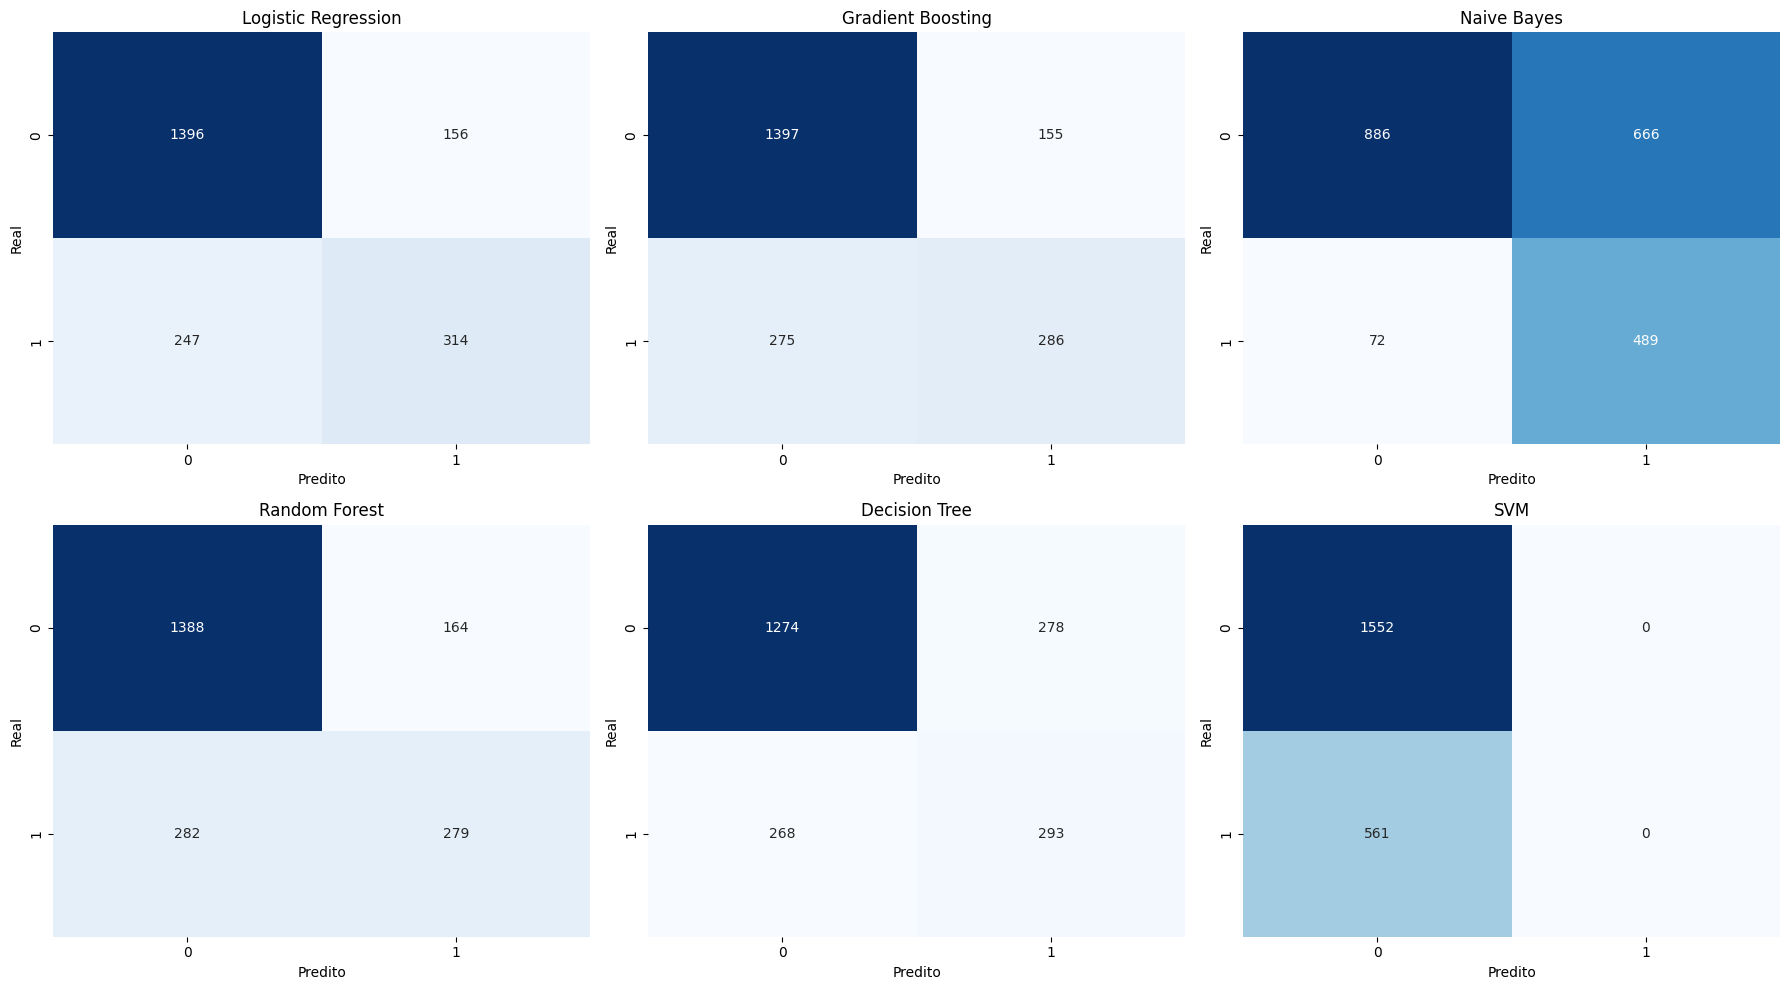

In [1]:
# 1. Importações
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Pré-processamento rápido (se ainda não fez)
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df.drop(['customerID'], axis=1, inplace=True)

# Label Encoding (variáveis binárias)
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' and len(df[col].unique()) == 2:
        df[col] = le.fit_transform(df[col])

# One-Hot Encoding (demais variáveis categóricas)
df = pd.get_dummies(df, drop_first=True)

# Separar X e y
X = df.drop('Churn', axis=1)
y = df['Churn']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Treinar modelos
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True)  # `probability=True` para uso em métricas como ROC AUC
}

# Treinar os modelos
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)

# 4. Função de matriz de confusão
def plot_confusion(model, X_test, y_test, ax, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(title)
    ax.set_xlabel('Predito')
    ax.set_ylabel('Real')

# 5. Plotar todas as matrizes
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (nome, modelo) in enumerate(modelos.items()):
    plot_confusion(modelo, X_test, y_test, axes[idx], nome)

plt.tight_layout()
plt.show()
